In [134]:
import pandas as pd
import os
from multiprocessing import Pool
#%matplotlib inline

outDir='/cellar/users/btsui/Data/Project/Skymap/ChipSeq/EpigenomeRoadmap/'
all_fnameS=pd.Series(os.listdir(outDir))
fnameS=all_fnameS[all_fnameS.str.contains('.wig.gz$')]

bedOutDir='/cellar/users/btsui/Data/Project/Skymap/ChipSeq/EpigenomeRoadmap_inter/'
#os.mkdir(bedOutDir)

myCmdFmt="gunzip -c {inFname}  | wig2bed  --do-not-sort | ./filter_zero.py |gzip > {outFname}"

#myFname=fnameS[fnameS.str.contains('.wig.gz$')].iloc[0]

CWD='/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/Chip-seq'
os.chdir(CWD)

inFnames=fnameS[fnameS.str.contains('.wig.gz$')].values

#!wig2bed
def wigToBed(myFname):
    myCmd=myCmdFmt.format(inFname=outDir+myFname,outFname=bedOutDir+myFname.replace('.wig.gz','.bed.gz'))
    return os.system(myCmd)



p=Pool(48)
p.map(wigToBed,inFnames)

In [63]:
#myCmd=myCmdFmt.format(inFname=outDir+myFname,outFname=bedOutDir+myFname.replace('.wig.gz','.bed.gz'))

### scratch

In [ ]:
tmpDf=pd.read_csv(outDir+myFname,sep='\t',header=None)

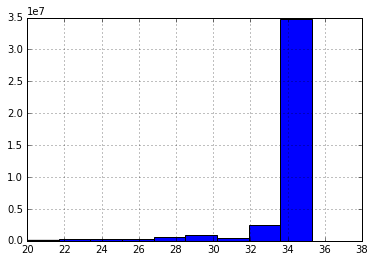

In [7]:
(tmpDf.end-tmpDf.start).hist()

In [8]:
tmpDf.shape

(40071384, 5)

In [53]:
#!chmod u+x ./filter_zero.py

In [54]:
!echo $PWD/filter_zero.py

/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/Chip-seq/filter_zero.py


In [5]:
tmpDf=pd.read_csv('/cellar/users/btsui/Data/Project/Skymap/ChipSeq/EpigenomeRoadmap_inter/GSM493384_UW.CD34.rep1.ChromatinAccessibility.CD34+-DS12274.bed.gz',sep='\t',header=None)

In [6]:
tmpDf.columns=['Chr','Start','End','Count']

In [7]:
VC=tmpDf.Count.value_counts()

In [11]:
tmpDf.shape

(14341948, 4)

In [105]:
#ignore those with 1 and 2
subDf=tmpDf[tmpDf.Count>=10]
diffS=subDf.End.diff()
m=(diffS<=100)&(diffS>0)
diffS.loc[m]=20.0

In [106]:
subDf['Diff']=diffS

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [107]:
m=(subDf.Diff!=20.0)#not contingous
subDf.loc[m,'Group']=subDf.loc[m].index

In [108]:
subDf['Clean_Group']=subDf.Group.fillna(method='ffill')

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [109]:
g=subDf.groupby(['Clean_Group'])
groupStartS=g.Start.first()


In [110]:
groupDf=pd.DataFrame({'Start':g.Start.first(),
             'End':g.End.last(),
             'Chr':g.Chr.first()})

In [116]:
146389/177280.0

0.8257502256317689

In [117]:
groupDf.shape

(146389, 3)

In [121]:
#groupDf

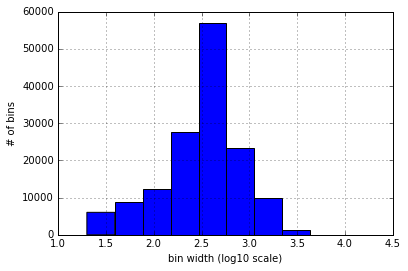

In [131]:
ax=np.log10( (groupDf.End-groupDf.Start)).hist()
ax.set_xlabel('bin width (log10 scale)')
ax.set_ylabel('# of bins')

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


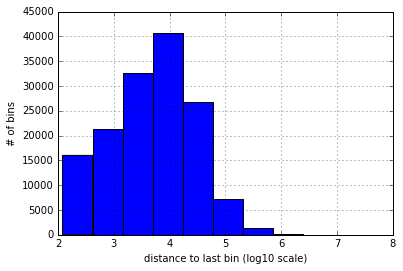

In [130]:
import numpy as np
ax=np.log10(diffS[diffS!=20.0]).hist()
ax.set_xlabel('distance to last bin (log10 scale)')
ax.set_ylabel('# of bins')

In [38]:
print 'number of break point:',(diffS!=20.0).sum()

number of break point: 177280


In [90]:
diffS[diffS!=20.0].sort_values()

6637959    -247050380.0
8654150    -242534380.0
9578523    -199385880.0
10267466   -191171320.0
11022765   -180548140.0
11844624   -170754440.0
12594893   -158804500.0
14305378   -154913540.0
13243393   -146271920.0
13832492   -140174200.0
692016     -135196740.0
1402852    -134405860.0
2103313    -114217280.0
3369473    -100338680.0
2478525     -96053320.0
3864710     -88692940.0
2932481     -87994660.0
4469505     -78652300.0
4783631     -75919240.0
5328998     -63789780.0
14341120    -57772840.0
7026851     -52708200.0
7509808     -49569280.0
7221358     -31714260.0
5344499            40.0
5352433            40.0
5352399            40.0
5340646            40.0
5351775            40.0
5350299            40.0
               ...     
408948        1893060.0
13391076      2104060.0
10641886      2190320.0
5985027       2275640.0
4543145       2303300.0
14258055      2347780.0
204447        2483620.0
4236998       2507400.0
14128553      2535720.0
11517549      2804400.0
12808126      30

In [31]:
177280/14341948.0

0.012360942878889256